# Overfitting, the Bias-Variance Trade-Off, and Multicollinearity

In this notebook we'll touch on a few issues that can pop up in regression. We'll also introduce the bias-variance trade-off, which is present in all of supervised learning, not just regression.

## What We'll Accomplish in This Notebook

In particular we'll:

<ul>
    <li>Touch on the multicollinearity problem for regression,</li>
    <li>Show a few ways we can overfit the data,</li>
    <li>Introduce the bias-variance trade-off in general,</li>
    <li>Give a regression specific example of the bias-variance trade-off.</li>
</ul>

In [1]:
# import the packages we'll use
## For data handling
import pandas as pd
import numpy as np
from numpy import meshgrid

## For plotting
import matplotlib.pyplot as plt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")

## Multicollinearity

One common issue that can arise when fitting regression models is multcollinearity. This is where some of your predictors are correlated with one another. Let's look at a synthetic example then you'll play around with some BMI data.

In [2]:
# x1 and x2 are our features
x1 = np.random.random(200)

# but x2 is actually a function of x1
x2 = 1-x1+.2*np.random.randn(200)

# y is the target
y = x1 + .2*np.random.randn(200)

# Hold this in a df
df = pd.DataFrame({'x1':x1,'x2':x2,'y':y})

df_copy = df.copy()
df_train = df_copy.sample(frac = .75, random_state = 440)
df_test = df_copy.drop(df_train.index)

In [3]:
df_train.corr()['y']

x1    0.857332
x2   -0.709372
y     1.000000
Name: y, dtype: float64

In [4]:
from pandas.plotting import scatter_matrix

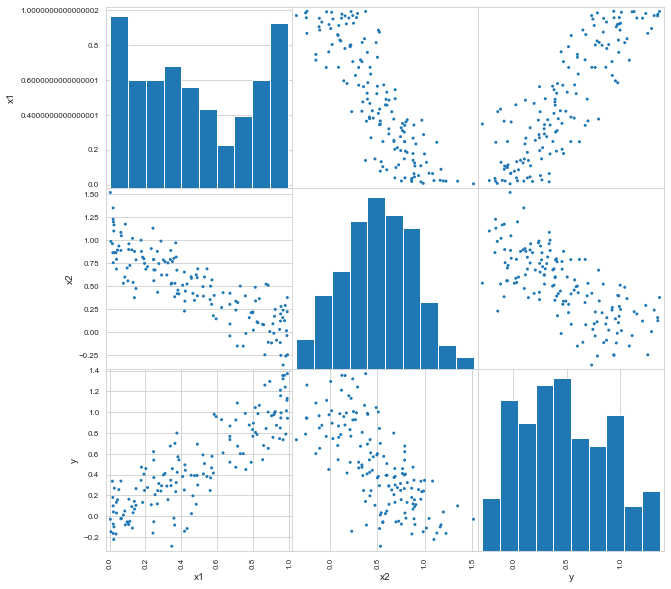

In [5]:
scatter_matrix(df_train, figsize=(10,10), alpha = 1)

plt.show()

If we didn't know the true relationship between $y$ and $x_1$ we may be tempted to just toss in $x_1$ and $x_2$ into a model and call it a day, but as we know $x_2$ is a function of $x_1$. Letting $X$ denote the feature matrix with a column of ones, one column of $X$ is a linear combination of the other two. When this occurs the matrix $X^T X$ is not of full rank, which means it is not invertible, but remember
$$
\hat{\beta} = (X^T X)^{-1} X^T y.
$$

So not being invertible is a big problem for us. Fortunately it is rarely the case that one predictor is a perfect linear combination of other predictors. However, one feature being highly correlated with other features can make a matrix close to singular, which is no good for your computer.

When features are highly correlated with one another we can get varying model output depending on the features we put into the model. Let's bring back the `statsmodel` package to examine this issue.

In [6]:
# Import the package
import statsmodels.api as sm 

In [7]:
# We have to add in the constant for sm.OLS
df_train['const'] = 1

# Fit a model with both x1 and x2
lr = sm.OLS(df_train['y'], df_train[['const','x1','x2']])

# Now fit the model
fit = lr.fit()

# fit.summary makes a snazy table for us to look at
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     205.7
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           2.52e-43
Time:                        09:51:28   Log-Likelihood:                 20.883
No. Observations:                 150   AIC:                            -35.77
Df Residuals:                     147   BIC:                            -26.73
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1308      0.092     -1.419      0.1

In [8]:
# Now one with only x2
lr = sm.OLS(df_train['y'], df_train[['const','x2']])

# Now fit the model
fit = lr.fit()

# fit.summary makes a snazy table for us to look at
print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.500
Method:                 Least Squares   F-statistic:                     149.9
Date:                Mon, 13 Apr 2020   Prob (F-statistic):           3.02e-24
Time:                        09:51:30   Log-Likelihood:                -26.737
No. Observations:                 150   AIC:                             57.47
Df Residuals:                     148   BIC:                             63.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8672      0.040     21.758      0.0

We can see that the model estimates for $x_2$ change greatly depending on whether or not $x_1$ is included in the model. In addition, whether or not $x_2$ is considered a significant predictor also drastically changes.

Multicollinearity can be bad news in the model building process if you pretend like it isn't there. One way to address it is to leave out one of the variables. Here it would probably be best to use only $x_1$ as the predictor, however, in the real world you don't know which predictor is the correct one.

We'll learn some other tools later in the course like PCA and regression trees that address the multicollinearity problem. For now be away that this problem exists and you should watch for it in your own data.

## Questions

<br>
<br>
<br>
<br>
<br>

## End Questions

## Practice

Explore the following `bmi` data set, this data comes from <a href="https://plos.figshare.com/articles/Secular_trends_in_body_height_body_weight_BMI_and_fat_percentage_in_Polish_university_students_in_a_period_of_50_years/9208028">here</a>. 

The goal here is to predict the variable `fat_perc`. Don't build the model, only explore the data set for multicollinearity. Do you think it is present? 

After you're done exploring do a web search for the BMI formula.


When your TA thinks everyone is ready they'll instruct you to move on to the next phase of the notebook.

In [9]:
bmi = pd.read_csv("bmi.csv")

In [ ]:
## Code here










In [ ]:
## Code here










In [ ]:
## Code here










In [ ]:
## Code here










## Overfitting the Data

In this next section we'll examine ways in which we can overfit the data with regression. You'll work through this portion of the notebook on your own and then we'll come back together to dicuss the bias-variance trade-off.

### Adding Too Many Predictors

One way you can overfit the data is by including too many predictors. Let's show this in action using randomly generated data.

In [ ]:
# Make a 500 by 10 array of random normal variables here
# Call it X_train, we'll use these as our "predictors".


In [ ]:
# Make a 500 by 1 array of random normal draw here
# Call it y_train, this will be our "target"


In [ ]:
# Make a second 500 by 10 array of random normal variables here,
# Call it X_test


In [ ]:
# Make a second 500 by 1 array of random normal draw here
# Call it y_test


In [ ]:
# Fit a regression model using any of the columns of X_train
# to predict y_train.
# Calculate the training mse and the test mse of this model
## Code here







In [ ]:
## Code here







In [ ]:
## Code here







In [ ]:
## Code here







In [ ]:
# Now fit a regression model using all of X_train
# to predict y_train.
# Calculate the training mse and the test mse of this model
## Code here


In [ ]:
## Code here







In [ ]:
## Code here







In [ ]:
## Code here







In [ ]:
## Code here







##### What did you Notice?

Write down any observations for yourself in this block here.









### High Degree Polynomials

Another way (but slightly similar to the previous section of these notes) to overfit the data is to add too high a degree of polynomials to the data. Again we'll construct an example to show the issue.

In [ ]:
# Make 2 1-D arrays, x_train and x_test, both spaced from -1.5 to 1.5 with 100 
# evenly spaced entries


In [ ]:
# make y a 5th degree polynomial of x_train and store it in y_train
# make all of your coefficients no larger than 1
# add normally distributed random noise to y
# multiply the noise by a constant no larger than 1


In [ ]:
# to make y_test copy and paste the code to make y_train
# but replace x_train with x_test


In [ ]:
# Make a scatter plot of x_test by y_test


In [ ]:
# Make a loop from i = 1 to 31, skipping the even numbers,

# for each i make a pipeline that transforms x
# into a polynomial array of degree i
# then fit a regression of y on the powers of x
# record both the training set mse and the test set mse








In [ ]:
# Plot the degree vs the corresponding training and test mses
# Label them so you know which is which.








##### What did you notice?

Take a moment to write down what you observed through this exercise here.












## The Bias-Variance Trade-Off

Let's return to our statistical learning framework from Notebook 1. Remember we try to fit the following model:
$$
y = f(X) + \epsilon,
$$
where $f$ is some function.

When we fit the model we produce some estimate of $f$ called $\hat{f}$. 

As we've discussed we're interested in the generalization error of our algorithm, which so far has been the test MSE. Like with CV when we consider the generalization error we look at the expected value of the squared difference between $y$ and $\hat{y}$. If we let $y_0$ and $X_0$ denote a single test set, we can write this mathematically as:
$$
E\left[ \left( y_0 - \hat{y_0} \right)^2 \right]= E\left[ \left( y_0 - \hat{f}(X_0) \right)^2 \right] = E \left[ \left( f(X_0) - \hat{f}(X_0) + \epsilon   \right)^2 \right],
$$
where all expectations are taken over the training space.

With a little manipulation you can rewrite this as:
$$
\text{Var}\left(\hat{f}(X_0)\right) + \left[ \text{Bias}\left( \hat{f}(X_0) \right) \right]^2 + \text{Var}(\epsilon)
$$
$$
= \text{Variance of }\hat{f} + \text{Bias squared of }\hat{f} + \text{irreducible error}.
$$

If $\text{Bias}$ is unfamiliar to you then, $\text{Bias}\left(\hat{f}(X)\right) = E\left( f(X) - \hat{f}(X) \right)$. One way to think about it is how far on average is the estimator $\hat{f}$ from the thing it is estimating, $f$.

Since $\text{Var}$ and $\text{Bias}^2$ are both nonnegative, the best we can do is produce an algorithm with irreducible error $\text{Var}(\epsilon)$. This means we can reduce our generalization error by reducing our $\text{Bias}$ or our $\text{Var}$. However, it is often not possible to reduce both simultaneously. Many times lowering an algorithm's $\text{Bias}$ leads to an increase in its $\text{Var}$. Typically high bias indicates underfitting the data, while high variance means overfitting.

We'll now show this in action with linear regression.

### Bias-Variance Trade-Off with Linear Regression

Let's build some toy data to play with

In [10]:
x = np.linspace(-3,3,100)
y = x*(x-1) + 1.2*np.random.randn(100)

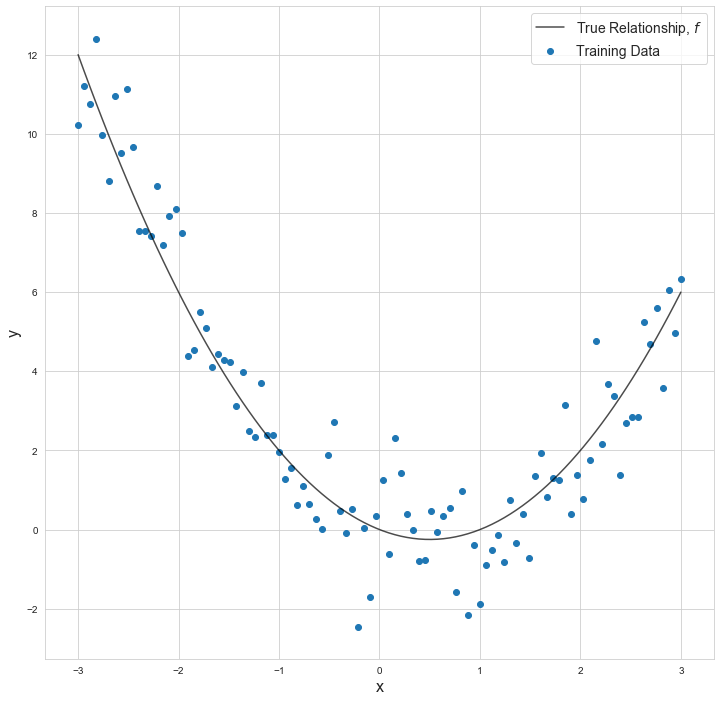

In [11]:
plt.figure(figsize = (12,12))

plt.plot(x, x*(x-1),'k', label = "True Relationship, $f$", alpha = .7)
plt.scatter(x, y, label = "Training Data")

plt.ylabel("y", fontsize=16)
plt.xlabel("x", fontsize=16)

plt.legend(fontsize=14)

plt.show()

A linear regression model with high bias but low variance would be to use no predictors and just take the mean observed $y$ value. This would be way underfitting the data, which has a clear pattern. It is high bias because we are far from the true relationship between $y$ and $x$. It is low variance because with a large enough sample the law of large numbers tells us the sample mean should be close to $E(y)$. So as long as our training sample is large enough then we won't vary much over different samples.

A linear regression model with low bias but high variance would be to use a high degree polynomial of $x$. This is low bias because a high degree polynomial will more closely fit the true relationship. It will have high variance because as the degree of the fitting polynomial increases the more likely it is that the regression polynomial will attempt to fit all of the training points perfectly, meaning that you will get wildly different fits with each training set.

A goldilocks, not too warm not too hot, model would be one with a low degree polynomial. For this particular problem it would likely be a parabola model, but could be a slightly higher degree in practice.

In the following code block we fit three models five times. The first model just takes the mean of the training $y$ values. The second model is the "Goldilocks" model where we fit a parabola to the data. The final model is the high variance model where we fit a degree $20$ polynomial to the data. We then plot the predicted values for all 15 total model fits.

In [34]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

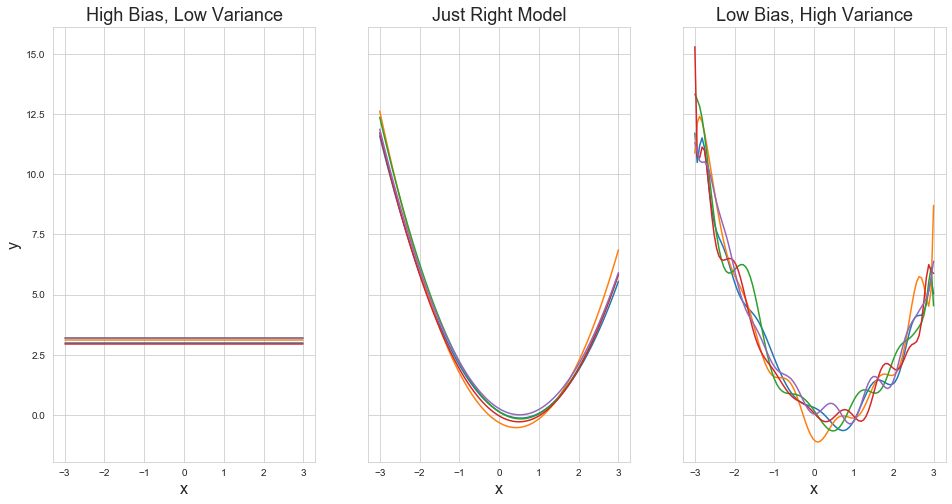

In [33]:
# We'll plot 5 instances of all 3 models
fig,ax = plt.subplots(1,3,figsize = (16,8), sharex = True, sharey = True)
bias = []

for i in range(5):

    # First generate a random training set
    x = np.linspace(-3,3,100)
    y = x*(x-1) + 1.2*np.random.randn(100)

    # Now fit the high variance model
    high_deg_pipe = Pipeline([('poly',PolynomialFeatures(20)),
                             ('reg', LinearRegression(copy_X = True))])

    high_deg_pipe.fit(x.reshape(-1,1),y)

    high_deg_line = high_deg_pipe.predict(x.reshape(-1,1))



    # Now fit the "goldilocks model", the true correct degree
    pipe = Pipeline([('poly',PolynomialFeatures(2)),
                    ('reg', LinearRegression(copy_X = True))])
    pipe.fit(x.reshape(-1,1),y)
    pipe_line = pipe.predict(x.reshape(-1,1))




    # Plot High Bias low Variance plot
    ax[0].plot(x, np.mean(y)*np.ones(len(x)), alpha = 1)
    ax[0].set_title("High Bias, Low Variance",fontsize=18)
    ax[0].set_ylabel("y", fontsize=16)
    ax[0].set_xlabel("x", fontsize=16)


    # Plot Goldilocks model
    ax[1].plot(x, pipe_line, alpha = 1)
    ax[1].set_title("Just Right Model",fontsize=18)
    ax[1].set_xlabel("x", fontsize=16)

    # Plot High Va model
    ax[2].plot(x, high_deg_line, alpha = 1)
    ax[2].set_title("Low Bias, High Variance",fontsize=18)
    ax[2].set_xlabel("x", fontsize=16)


plt.show()

## Questions?

<br>
<br>
<br>
<br>

## End Question Time

Often the best model is the one that finds a balance between the Bias and the Variance. If you Google bias-variance trade-off, you'll see a picture like this along with links to tons of poorly written blog posts.
<img src="biasvariance.png"></img>

This picture shows that the place where the minimal generalization error occurs is near to where the Bias equals the Variance. Let's picture the average testing error as a function of different degrees for this data set.

In [14]:
# Generate a single test set
x_test = np.linspace(-3,3,100)
y_test = x_test*(x_test-1) + 1.2*np.random.randn(100)

In [15]:
test_errors = np.zeros((10,len(range(1,41))))

# We'll generate 10 training sets
for i in range(10):
    x = np.linspace(-3,3,100)
    y = x*(x-1) + 1.2*np.random.randn(100)

    for j in range(1,41):
        pipe = Pipeline([('poly',PolynomialFeatures(j)),
                             ('reg', LinearRegression(copy_X = True))])
        pipe.fit(x.reshape(-1,1),y)
        
        pred = pipe.predict(x_test.reshape(-1,1))
        test_errors[i,j-1] = np.sum((pred - y_test)**2)/len(y_test)

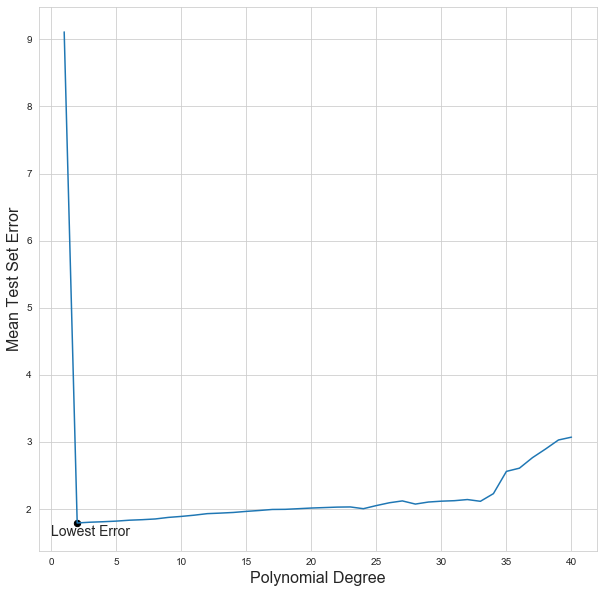

In [16]:
plt.figure(figsize = (10,10))

plt.plot(range(1,41), np.mean(test_errors,axis=0))

plt.xlabel("Polynomial Degree", fontsize = 16)
plt.ylabel("Mean Test Set Error", fontsize = 16)

plt.scatter(np.argmin(np.mean(test_errors,axis=0)) + 1, 
         np.min(np.mean(test_errors,axis=0)), s=40, c="black")

plt.text(np.argmin(np.mean(test_errors,axis=0)) - 1, 
         np.min(np.mean(test_errors,axis=0)-.2), 
         "Lowest Error", fontsize = 14)

plt.show()

As we suspected the lowest mean error occurred with the degree $2$ model. This is the model where Bias and Variance are equal or close to equal.


This isn't the last time we'll see the bias-variance trade-off in this course. A general rule of thumb to remember is that the "simpler" the model the more likely it is to have high bias$^2$ (underfit), the more "complex" a model the more likely it is to have high variance (overfit). Where what "simple" and "complex" means depends on the context of the problem.

That's it for this notebook. We'll learn about two techniques to have more complex models while avoiding overfitting in the next notebook.